#***YULU CASE STUDY***

##**1. Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset**

###**Import Libraries and load data**

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import norm,binom,geom,t,ttest_1samp,ttest_ind,ttest_rel,chisquare,chi2_contingency,f_oneway,poisson,expon,shapiro,kruskal,levene
from statsmodels.graphics.gofplots import qqplot

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/yulu_data.csv')

Mounted at /content/drive


###**Initial Data analysis and Cleanup**

In [2]:
data.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
print(f'Rows : {data.shape[0]}\nColumns : {data.shape[1]}')

Rows : 10886
Columns : 12


In [5]:
#Converting columns to relevant datatypes
data['datetime'] = pd.to_datetime(data['datetime'])
convert_dict = {
                'season': object,
                'holiday': object,
                'workingday': object,
                'weather' : object
               }
data = data.astype(convert_dict)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [7]:
#Checking missing values:
data.isnull().sum()/len(data)*100

datetime      0.0
season        0.0
holiday       0.0
workingday    0.0
weather       0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
count         0.0
dtype: float64

In [8]:
#Checking if any duplicate values:
data.duplicated().sum()

0

In [9]:
data.describe(include="all")

<ipython-input-9-959e96f52f7b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include="all")


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000


**Initial data Insights :-**
*   The data consists of total 10886 rows and 12 columns
*   There were no missing values or duplicates.
*   There are some columns in a irrelavent data type and so are converted to appropriate data type.
*   The mean of actual temperature, feeling temperature, humidity, wind speed, no.of bikes rented from the given data were 20.23, 23.65, 61.88, 12.79, 191.57 respectively.






In [10]:
num_cols = [i for i in data.columns if data[i].dtype in ['float64', 'int64']]
cat_cols = [i for i in data.columns if data[i].dtype in ['object']]

In [11]:
data[cat_cols].melt().groupby(['variable', 'value'])[['value']].count()

value
variable   value       
holiday    0      10575
           1        311
season     1       2686
           2       2733
           3       2733
           4       2734
weather    1       7192
           2       2834
           3        859
           4          1
workingday 0       3474
           1       7412

###**Distribution of Numerical variables**

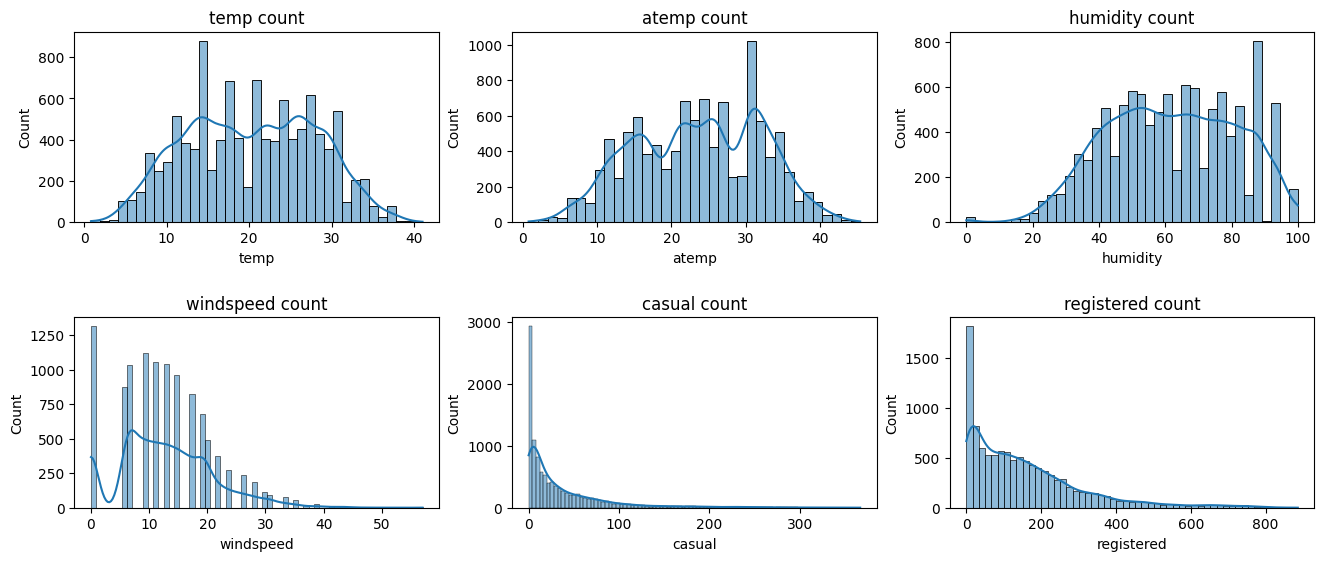

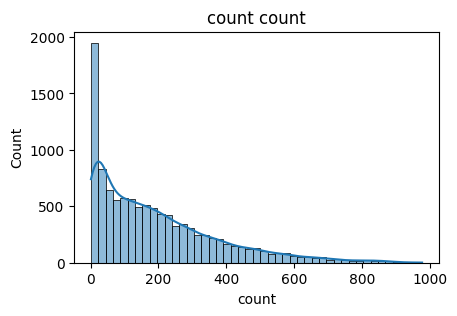

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 4))
fig.subplots_adjust(top=1.3, hspace=0.5)

count = 0
for row in range(2):
    for col in range(3):
        sns.histplot(data=data, x=num_cols[count], ax=axs[row, col], kde=True)
        axs[row, col].set_title(f'{num_cols[count]} count')
        count += 1

plt.figure(figsize=(4.7, 3))
sns.histplot(data=data,x=num_cols[count], kde=True)
plt.title(f'{num_cols[count]} count')
plt.show()

###**Distribution of Categorical variables**

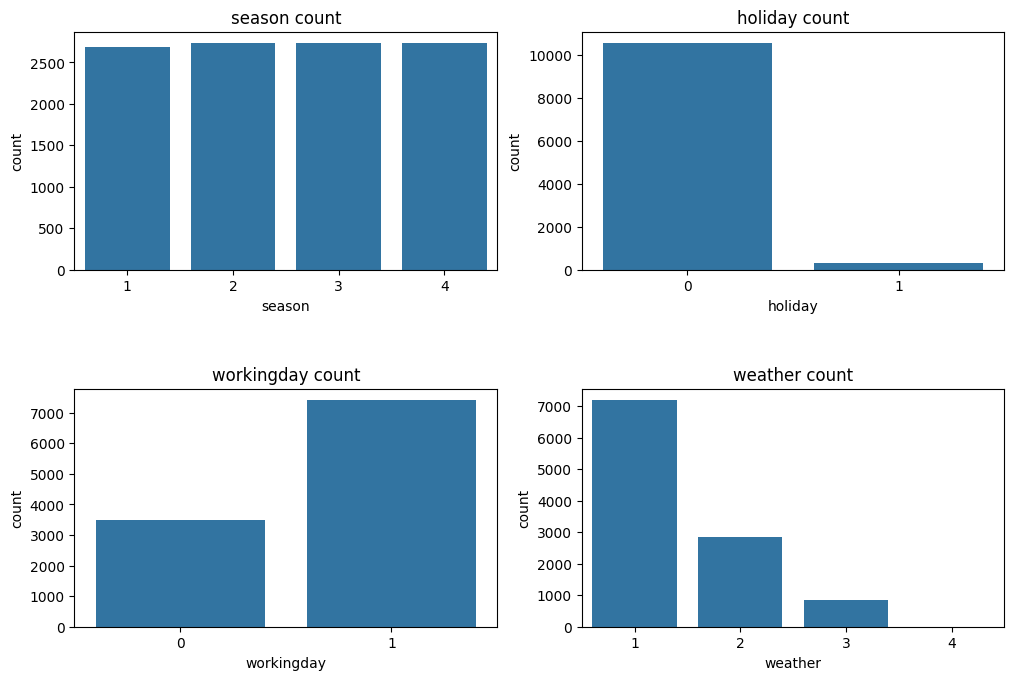

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 5))
fig.subplots_adjust(top=1.3, hspace=0.5)

count = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=data, x=cat_cols[count], ax=axs[row, col])
        axs[row, col].set_title(f'{cat_cols[count]} count')
        count += 1

###**Checking Outliers in Numerical Variables**

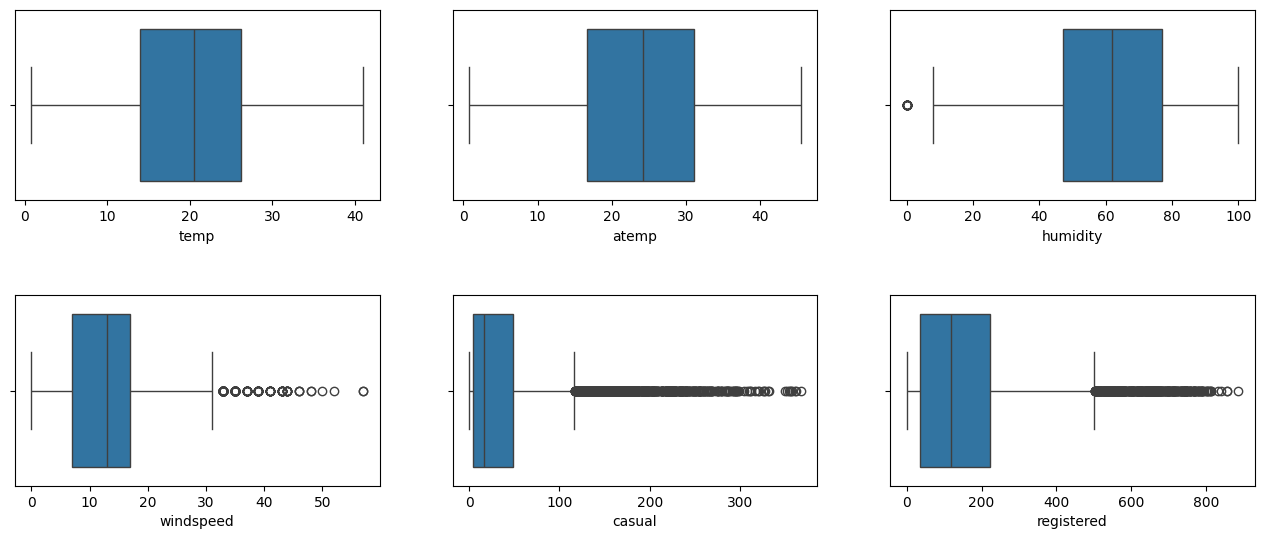

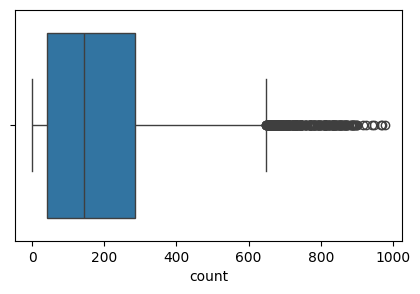

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 4))
fig.subplots_adjust(top=1.3, hspace=0.5)

count = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(data=data, x=num_cols[count], ax=axs[row, col])
        count += 1

plt.figure(figsize=(5, 3))
sns.boxplot(data=data,x=num_cols[count])
plt.show()

###**Counting Outliers using IQR**

In [15]:
def outliers_count(col):
  Q1 = np.percentile(data[col], 25, method='midpoint')
  Q3 = np.percentile(data[col], 75, method='midpoint')
  IQR = Q3 - Q1
  upper_count = np.array(data[col] >= (Q3+1.5*IQR)).sum()
  lower_count = np.array(data[col] <= (Q1-1.5*IQR)).sum()
  print(f'Upper Outliers count for {col} column is {upper_count} and Lower Outliers count for {col} column is {lower_count}')

In [16]:
outliers_count('windspeed')
outliers_count('casual')
outliers_count('registered')
outliers_count('count')

Upper Outliers count for windspeed column is 227 and Lower Outliers count for windspeed column is 0
Upper Outliers count for casual column is 749 and Lower Outliers count for casual column is 0
Upper Outliers count for registered column is 424 and Lower Outliers count for registered column is 0
Upper Outliers count for count column is 303 and Lower Outliers count for count column is 0


###**Categorical variables v/s count(no.of bikes rented)**

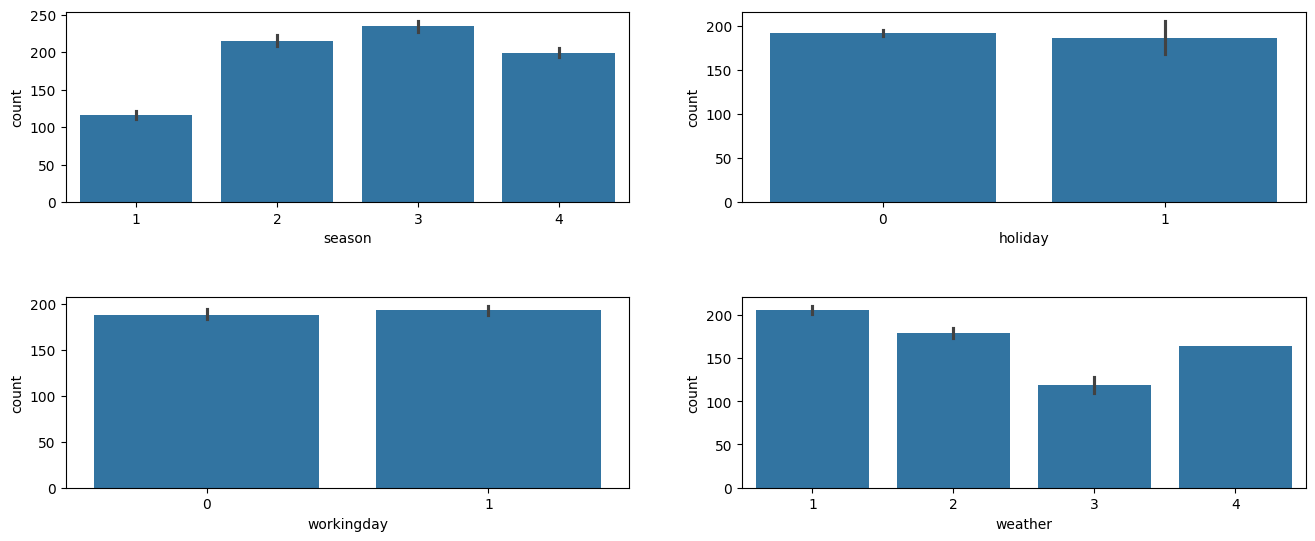

In [17]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16,4))
fig.subplots_adjust(top=1.3, hspace=0.5)

index = 0
for row in range(2):
    for col in range(2):
        sns.barplot(data=data, x=cat_cols[index], y='count', ax=axis[row, col])
        index += 1

plt.show()

**Insights:**

*   From the given data temperature and humidity distributions look normally distributed whereas casual and registered users count distributions look right skewed.
*   Count of outliers in windspeed, casual, registered, count were 227, 749, 424, 303 respectively.
*   Holiday and working day categories has no affect on no.of cycles rented.
*   More no.of cycles were rented in Season 3 (fall) and less no.of cycles were rented in season 1 (spring).
*   More no.of cycles were rented during weather 1 (Clear, Few clouds, partly cloudy, partly cloudy) and less no.of cycles were rented during weather 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds).







##**2. Try establishing a Relationship between the Dependent and Independent Variables.**

<ipython-input-18-3c5679f9b17a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


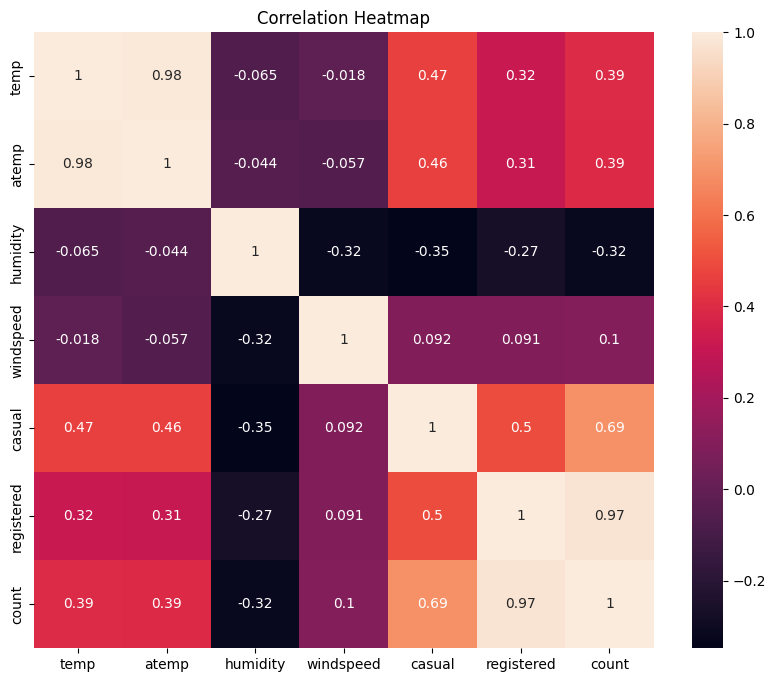

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

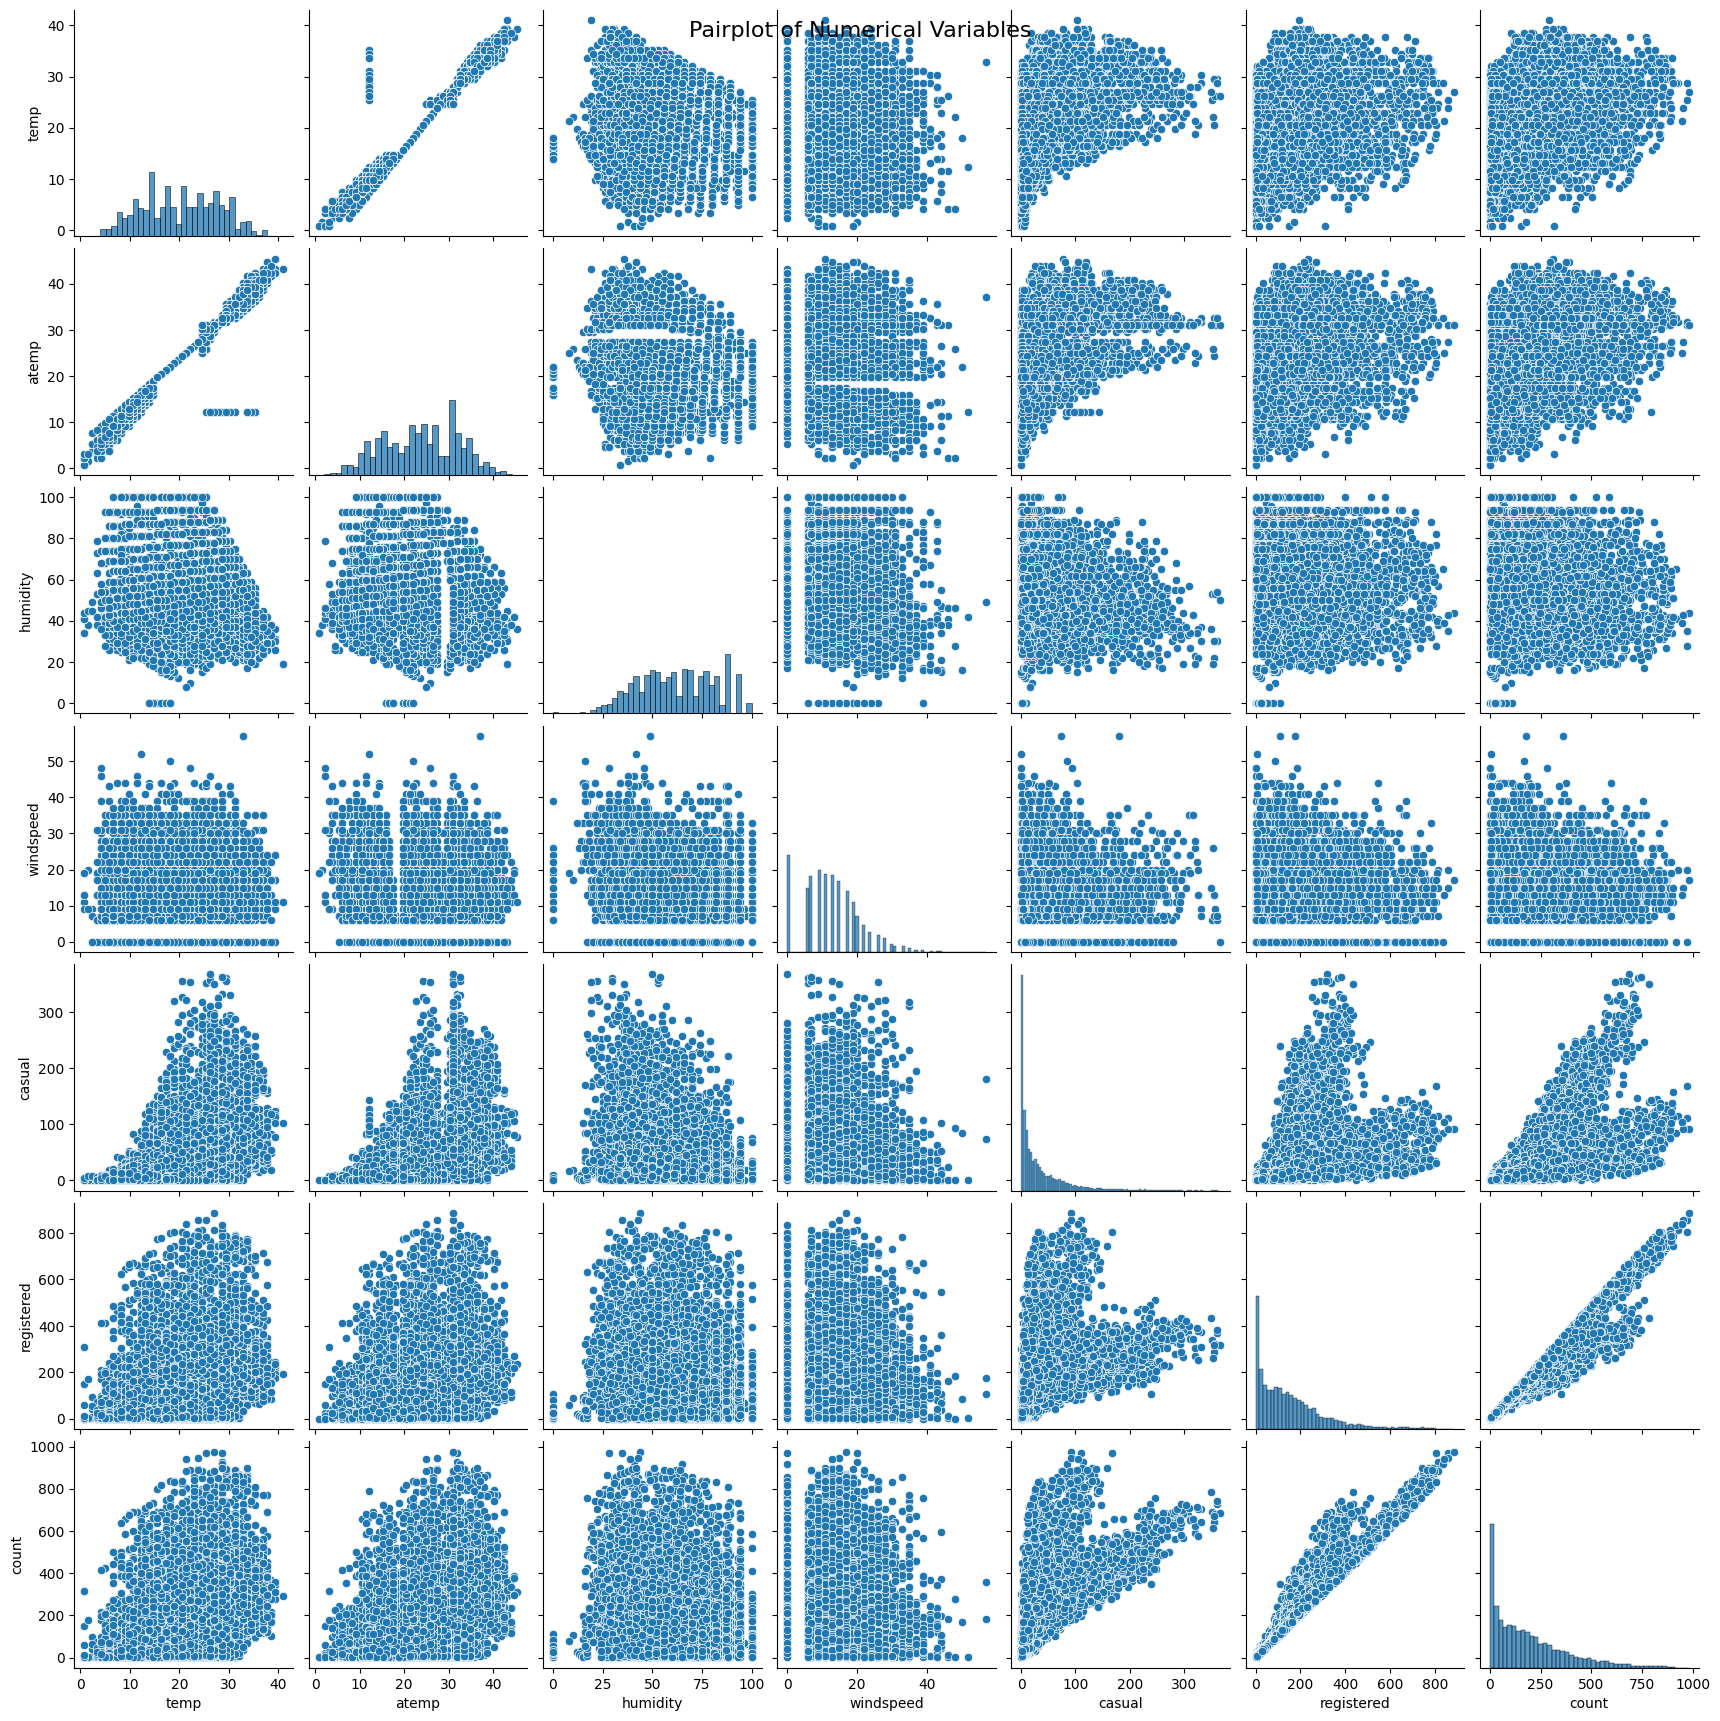

In [19]:
# Plotting the pairplot
sns.pairplot(data[num_cols])
plt.suptitle('Pairplot of Numerical Variables', fontsize=16)
plt.show()

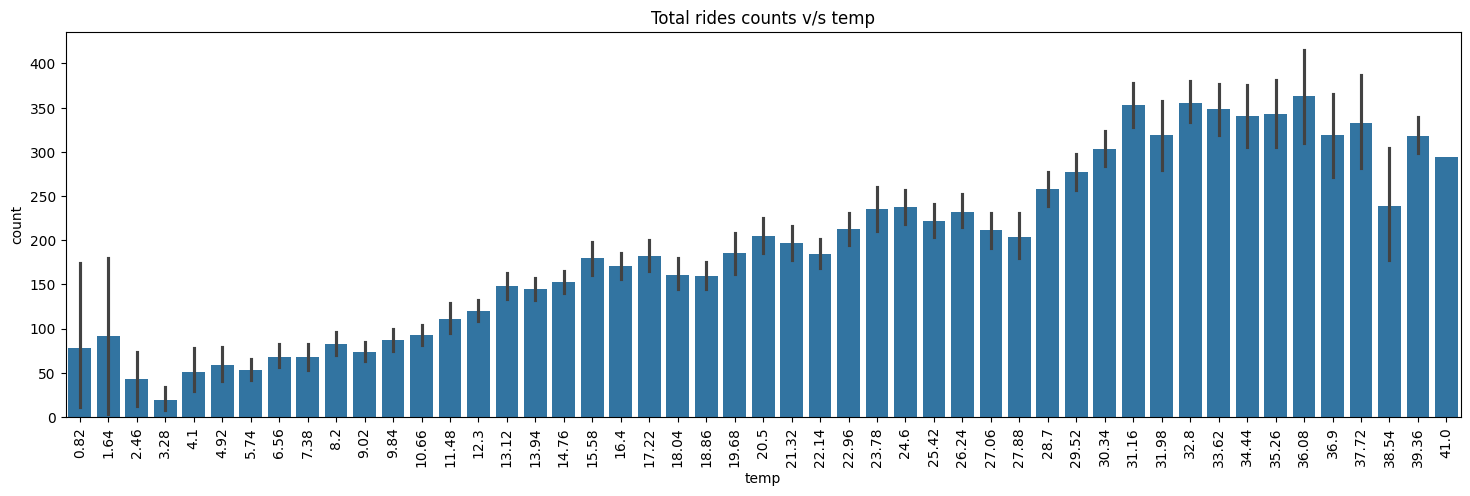

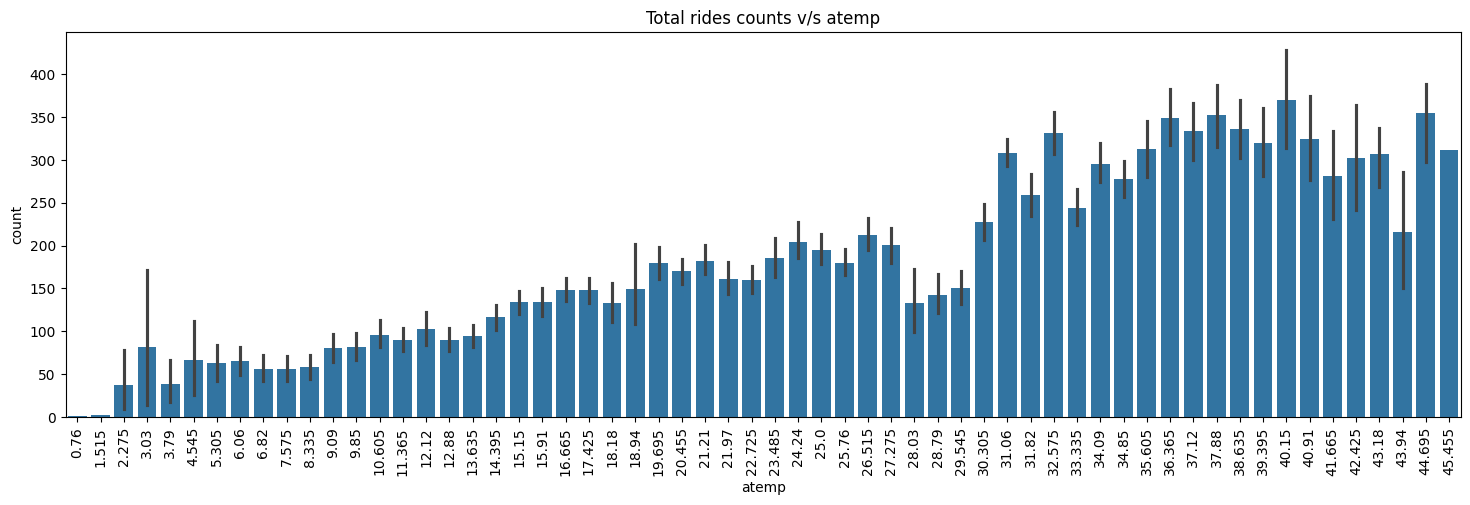

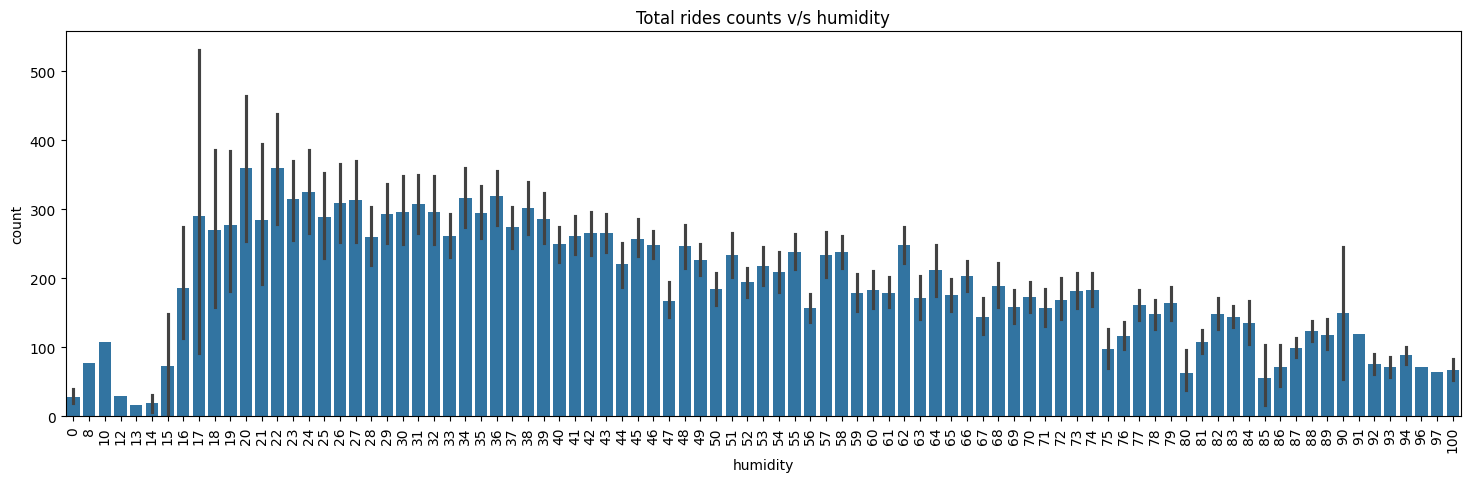

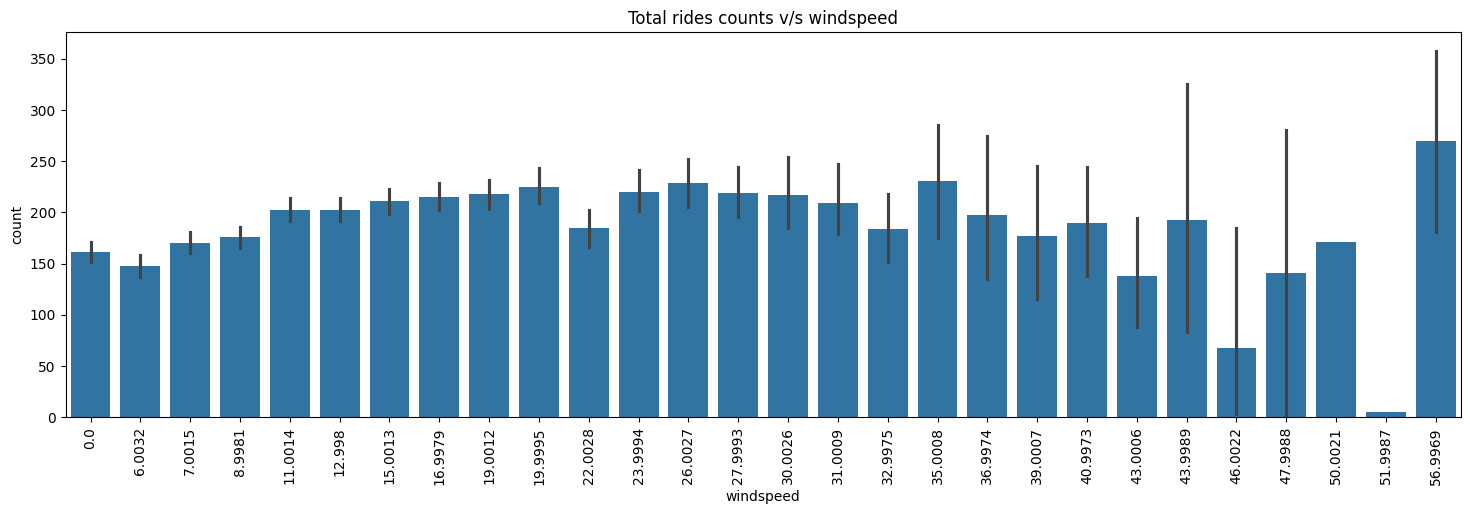

In [20]:
catagories=['temp', 'atemp', 'humidity', 'windspeed']
for i in catagories:
  plt.figure(figsize=(18,5))
  sns.barplot(data=data,x=i,y='count')
  plt.xlabel(i)
  plt.ylabel('count')
  plt.title(f'Total rides counts v/s {i}')
  plt.xticks(rotation=90)
  plt.show()

**Insights:**

*   As the temperature decreases there is a decrease in no.of bikes rented.
*   As the humidity increases there is a decrease in no.of bikes rented.
*   Windspeed is not affecting the no.of bikes rented.






##**3.1. Check whether working Day has effect on number of electric cycles rented**

**HO : Working Day has no effect on number of electric cycles rented**

**HA : Working Day has a significant effect on number of electric cycles rented**

In [21]:
alpha = 0.05
working_day_count = data.loc[data['workingday']==1]['count']
non_working_day_count = data.loc[data['workingday']==0]['count']
test_statistic,p_value = ttest_ind(working_day_count,non_working_day_count,alternative="two-sided")
print(f'p-value is {p_value} \ntest-statistic is {test_statistic}' )
if p_value < alpha:
  print('Reject null hypothesis(HO)\nWorking Day has a significant effect on number of electric cycles rented')
else:
  print('Failed to reject null hypothesis(HO)\nWorking Day has no effect on number of electric cycles rented')


p-value is 0.22644804226361348 
test-statistic is 1.2096277376026694
Failed to reject null hypothesis(HO)
Working Day has no effect on number of electric cycles rented


##**3.2. Check whether No. of cycles rented similar or different in different seasons**

**HO : Seasons has no effect on number of electric cycles rented**

**HA : Seasons has a significant effect on number of electric cycles rented**

In [22]:
season_1_count = data.loc[data['season']==1]['count'].values
season_2_count = data.loc[data['season']==2]['count'].values
season_3_count = data.loc[data['season']==3]['count'].values
season_4_count = data.loc[data['season']==4]['count'].values
seasons=[season_1_count,season_2_count,season_3_count,season_4_count]

###**Checking Assumptions**

**3.2.1 Normality check using Histplot**

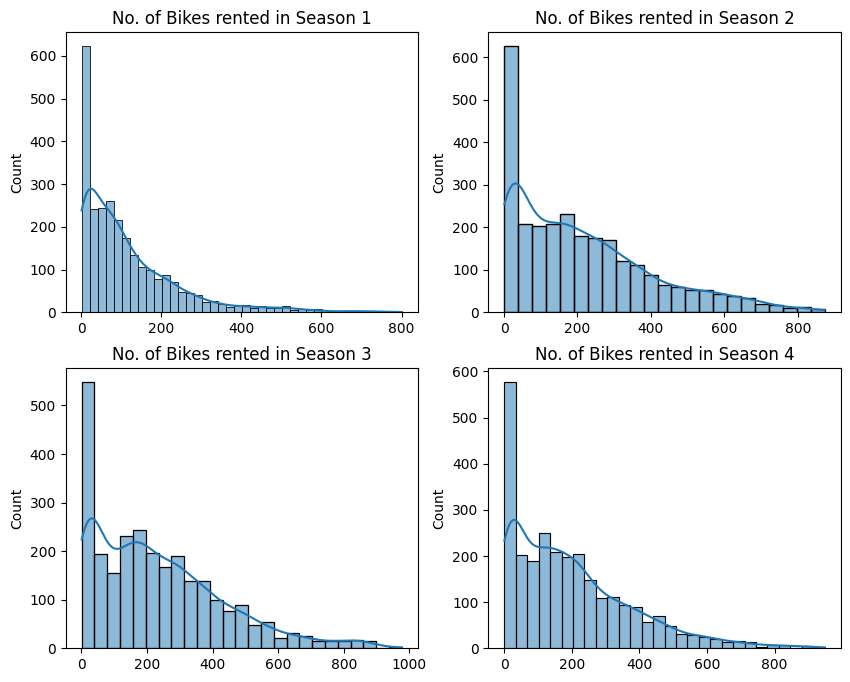

In [23]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
count=0
for i in range(2):
  for j in range(2):
    sns.histplot(data=seasons[count],kde=True, ax=axs[i,j])
    axs[i,j].set_title(f'No. of Bikes rented in Season {count+1}')
    count+=1
plt.show()

**3.2.2 Normality check using QQPlot**

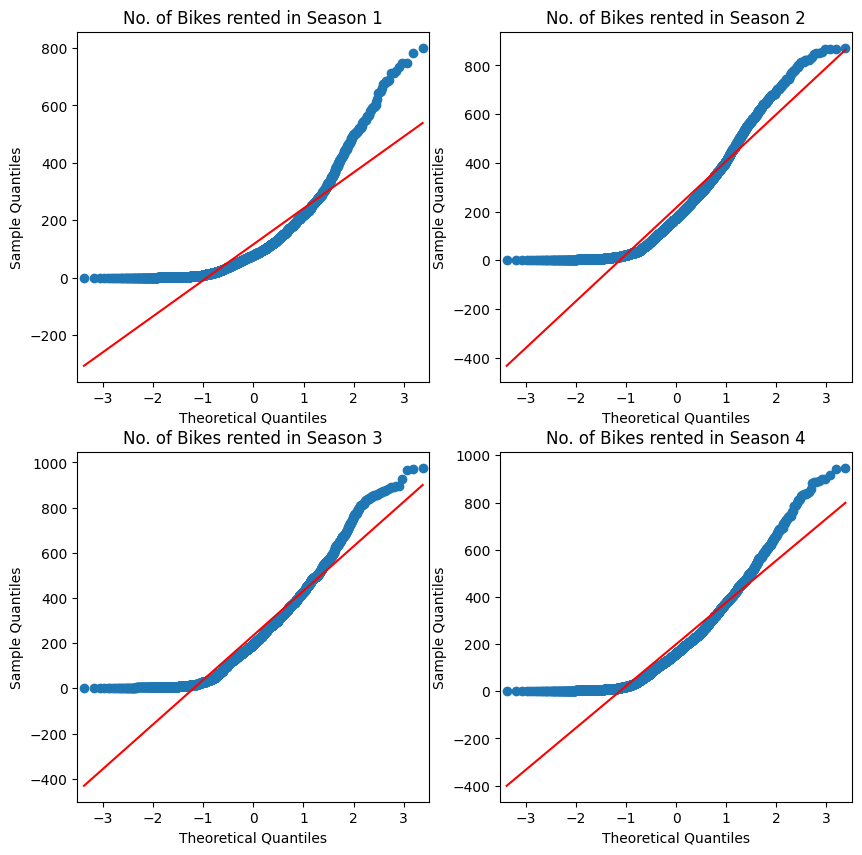

In [24]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
count=0
for i in range(2):
  for j in range(2):
    qqplot(data=seasons[count],line="s", ax=axs[i,j])
    axs[i,j].set_title(f'No. of Bikes rented in Season {count+1}')
    count+=1
plt.show()

**3.2.3 Normality check using Shapiro**

In [25]:
alpha=0.05
for i in range(len(seasons)):
  test_stat,p_value = shapiro(seasons[i])
  if p_value < alpha:
    print(f'Seasons {i+1} count Data is not normal')
  else:
    print(f'Seasons {i+1} count Data is normal')

Seasons 1 count Data is not normal
Seasons 2 count Data is not normal
Seasons 3 count Data is not normal
Seasons 4 count Data is not normal


**3.2.4 Equality Variance check using Levene**

In [26]:
alpha=0.05
test_stat,p_value = levene(seasons[0],seasons[1],seasons[2],seasons[3])
if p_value < alpha:
  print(f'Seasons count data have unequal variance')
else:
  print(f'Seasons count data have equal variance')

Seasons count data have unequal variance


###**Hypothesis test using ANOVA**

In [27]:
alpha = 0.05
test_statistic,p_value = f_oneway(season_1_count,season_2_count,season_3_count,season_4_count)
print(f'p-value is {p_value} \ntest-statistic is {test_statistic}' )
if p_value < alpha:
  print('Reject null hypothesis(HO)\nSeason has a significant effect on the number of electric cycles rented')
else:
  print('Failed to reject null hypothesis(HO)\nSeason has no effect on the number of electric cycles rented')

p-value is 6.164843386499654e-149 
test-statistic is 236.94671081032106
Reject null hypothesis(HO)
Season has a significant effect on the number of electric cycles rented


##**3.3. Check whether No. of cycles rented similar or different in different weather**

**HO : Weather has no effect on number of electric cycles rented**

**HA : Weather has a significant effect on number of electric cycles rented**

In [28]:
weather_1_count = data.loc[data['weather']==1]['count'].values
weather_2_count = data.loc[data['weather']==2]['count'].values
weather_3_count = data.loc[data['weather']==3]['count'].values
weather_4_count = data.loc[data['weather']==4]['count'].values
weathers=[weather_1_count,weather_2_count,weather_3_count,weather_4_count]

###**Checking Assumptions**

**3.3.1 Normality check using Histplot**

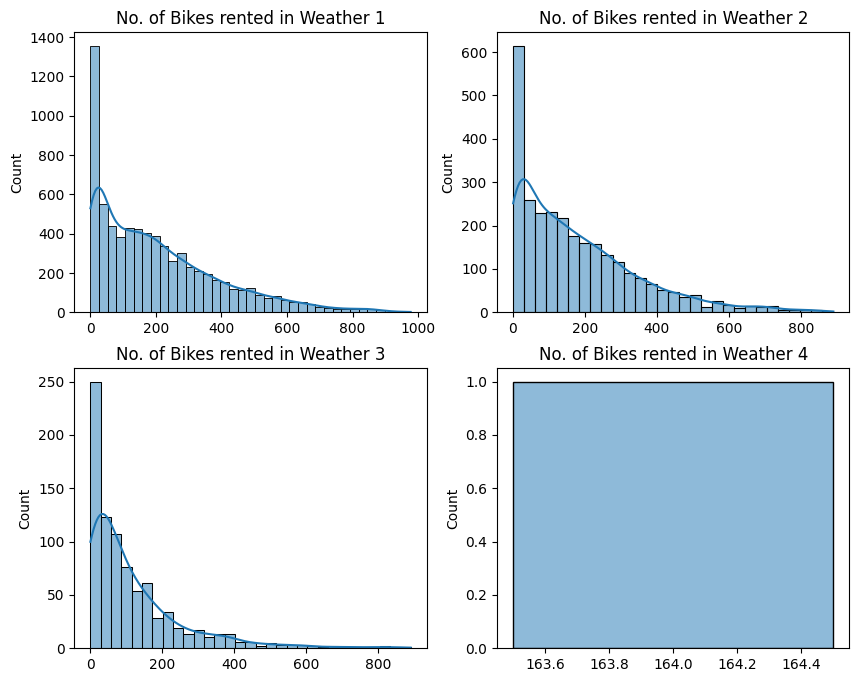

In [29]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
count=0
for i in range(2):
  for j in range(2):
    sns.histplot(data=weathers[count],kde=True, ax=axs[i,j])
    axs[i,j].set_title(f'No. of Bikes rented in Weather {count+1}')
    count+=1
plt.show()

**3.3.2 Normality check using QQPlot**

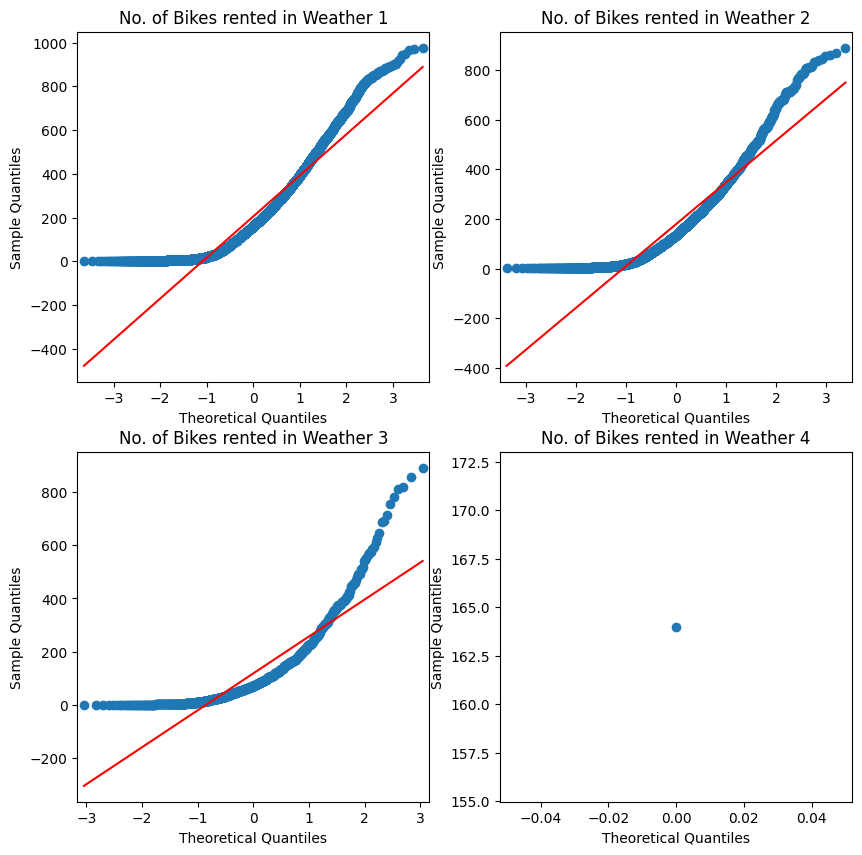

In [30]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
count=0
for i in range(2):
  for j in range(2):
    qqplot(data=weathers[count],line="s", ax=axs[i,j])
    axs[i,j].set_title(f'No. of Bikes rented in Weather {count+1}')
    count+=1
plt.show()

**3.3.3 Normality check using Shapiro**

In [31]:
alpha=0.05
for i in range(len(weathers)):
  if len(weathers[i])>=2:
    test_stat,p_value = shapiro(weathers[i])
    if p_value < alpha:
      print(f'Weather {i+1} count Data is not normal')
    else:
      print(f'Weather {i+1} count Data is normal')
  else:
    print(f'Weather {i+1} count Data is not normal')

Weather 1 count Data is not normal
Weather 2 count Data is not normal
Weather 3 count Data is not normal
Weather 4 count Data is not normal


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**3.3.4 Equality Variance check using Levene**

In [32]:
alpha=0.05
test_stat,p_value = levene(weathers[0],weathers[1],weathers[2],weathers[3])
if p_value < alpha:
  print(f'Weathers count data have unequal variance')
else:
  print(f'Weathers count data have equal variance')

Weathers count data have unequal variance


###**Hypothesis test using ANOVA**

In [33]:
alpha = 0.05
test_statistic,p_value = f_oneway(weather_1_count,weather_2_count,weather_3_count,weather_4_count)
print(f'p-value is {p_value} \ntest-statistic is {test_statistic}' )
if p_value < alpha:
  print('Reject null hypothesis(HO)\nWeather has a significant effect on the number of electric cycles rented')
else:
  print('Failed to reject null hypothesis(HO)\nWeather has no effect on the number of electric cycles rented')

p-value is 5.482069475935669e-42 
test-statistic is 65.53024112793271
Reject null hypothesis(HO)
Weather has a significant effect on the number of electric cycles rented


##**3.4. Check weather is dependent on season (check between 2 predictor variable)**

**HO : Weather is independent on season**

**HA : Weather is dependent on season**


###**Hypothesis test using chi2**

In [34]:
#creating crosstab
weather_season_ct = pd.crosstab(data['season'],data['weather'])
weather_season_ct

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [35]:
alpha = 0.05
chi2_contingency(weather_season_ct)
print(f'p-value is {p_value} \ntest-statistic is {test_statistic}' )
if p_value < alpha:
  print('Reject null hypothesis(HO)\nWeather is dependent on season')
else:
  print('Failed to reject null hypothesis(HO)\nWeather is independent on season')

p-value is 5.482069475935669e-42 
test-statistic is 65.53024112793271
Reject null hypothesis(HO)
Weather is dependent on season


##**Insights and recommendations:**

**Insights from the hypothesis testing with a significance level of 95%:**

*   Working Day has no effect on number of electric cycles rented
*   Season has a significant effect on the number of electric cycles rented
*   Weather has a significant effect on the number of electric cycles rented
*   Weather is dependent on season

**Recommendations:**

*   Adjust operations based on seasons; plan for peak times. During fall and summer season there was high demand. So maintain stock accordingly.
*   During Spring season the demand is very less. So offer more discounts accordingly.
*   Use weather info for smart strategies; offer discounts during bad weather (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds).
*   Maintain good stocks during clear weather conditions (Clear, Few clouds, partly cloudy, partly cloudy) as the number of rentals was more.
*   Implement dynamic pricing models that adjust rental prices based on weather conditions, offering lower prices during colder temperatures and higher humidity.
*   Keep an eye on unusual data points; make sure operations run smoothly.
*   Engage users with loyalty programs and bonuses.
*   Adjust pricing based on holidays and workdays.
*   Work with weather services for real-time updates.
*   Make sure enough bikes are available in popular locations during busy times.
*   Teach users about the benefits of biking in different weather.
*   Expand to areas where there's high demand during specific times.
*   Keep checking how well strategies work and make improvements based on data.








